In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline
from subprocess import check_output

In [ ]:
data = pd.read_csv('./datasets/sentiment_analysis.csv')

In [39]:
data.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [40]:
data = data[['text', 'sentiment']]

In [41]:
data.shape

(499, 2)

In [42]:
data['sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [43]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [44]:
train = train[train.sentiment != 'neutral']

In [45]:
train.head()

,text,sentiment
56,"I have bad headech, what I need to do now",negative
227,happy mother`s day to all the mothers in the w...,positive
280,Getting ready for week Its too nice today to ...,positive
220,"Errors are red but my life is blue, I love ros...",positive
448,I don`t want to sit at home on prom night. Som...,negative


In [46]:
train['sentiment'].unique()

array(['negative', 'positive'], dtype=object)

In [47]:
train_positive = train[train['sentiment'] == 'positive']
train_negative = train[train['sentiment'] == 'negative']
train_positive = train_positive['text']
train_negative = train_negative['text']

In [48]:
train_positive.head()

227    happy mother`s day to all the mothers in the w...
280    Getting ready for week  Its too nice today to ...
220    Errors are red but my life is blue, I love ros...
422                                     a mouth for sure
25                  Its amazing game, I playing everyday
Name: text, dtype: object

In [49]:
train_negative.head()

56             I have bad headech, what I need to do now
448    I don`t want to sit at home on prom night. Som...
376                      aww I miss driving down elmwood
154                           I'm studying in psychology
403         I wish I could get my nails done  stupid job
Name: text, dtype: object

In [50]:
train_positive.shape

(132,)

In [51]:
train_negative.shape

(98,)

In [52]:
train.shape, test.shape

((230, 2), (100, 2))

Positive Word Cloud


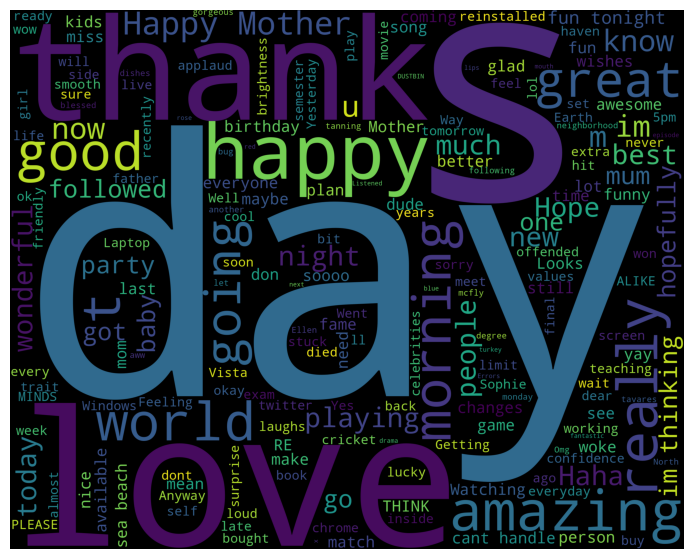

Negative Word Cloud


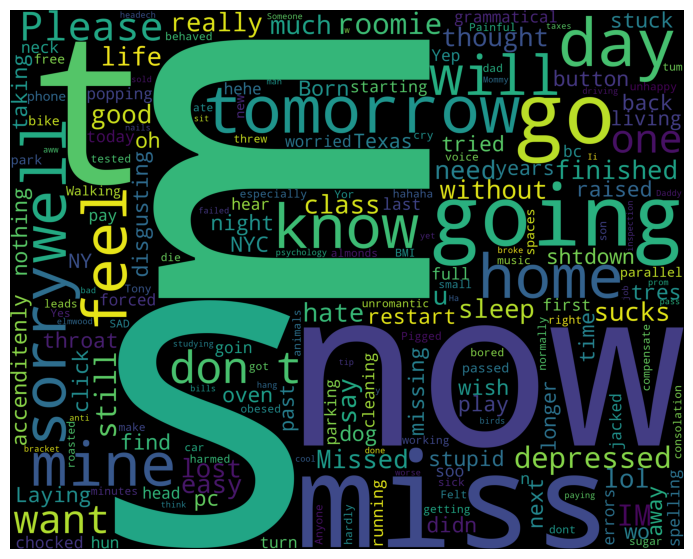

In [53]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split() if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT'])
    wordcloud = WordCloud(width = 2500, height = 2000, background_color = color, stopwords = STOPWORDS).generate(cleaned_word)
    plt.figure(1,figsize = (10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
print("Positive Word Cloud")
wordcloud_draw(train_positive,'black')
print("Negative Word Cloud")
wordcloud_draw(train_negative)

In [54]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\B\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
feedback = []
stopwords_set = set(stopwords.words('english'))
for index, row in train.iterrows():
    filtered_words = [e.lower() for e in row.text.split() if len(e)>=3]
    cleaned_words = [word for word in filtered_words if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word != 'RT']
    words_without_stopwords = [word for word in cleaned_words if word not in stopwords_set]
    feedback.append((words_without_stopwords, row.sentiment))

In [56]:
feedback

[(['bad', 'headech,', 'need'], 'negative'),
 (['happy', 'mother`s', 'day', 'mothers', 'world.'], 'positive'),
 (['getting', 'ready', 'week', 'nice', 'today', 'stuck', 'inside', 'working!'],
  'positive'),
 (['errors', 'red', 'life', 'blue,', 'love', 'rose', 'lips', 'baby'],
  'positive'),
 (['don`t', 'want', 'sit', 'home', 'prom', 'night.', 'someone', 'hang'],
  'negative'),
 (['mouth', 'sure'], 'positive'),
 (['aww', 'miss', 'driving', 'elmwood'], 'negative'),
 (['amazing', 'game,', 'playing', 'everyday'], 'positive'),
 (['fun', 'night!', 'listened', 'next', 'episode', 'turkey', 'drama'],
  'positive'),
 (['happy', 'birthday!', 'woke', 'side', 'earth,', 'wishes', 'bit', 'late'],
  'positive'),
 (['loves', 'mum', 'much!', 'happy', 'mothers', 'day', 'wonderful', 'mothers'],
  'positive'),
 (['studying', 'psychology'], 'negative'),
 (['wish', 'could', 'get', 'nails', 'done', 'stupid', 'job'], 'negative'),
 (['thank',
   'teaching',
   'values',
   'better',
   'person',
   'day',
   'lov

In [57]:
test_positive = test[test['sentiment'] == 'positive']
test_negative = test[test['sentiment'] == 'negative']
test_positive = test_positive['text']
test_negative = test_negative['text']

In [58]:
# It combines all the words from the feedback list into a single list of words.
def get_words_in_tweets(tweets):
    all_words = []
    for (words, sentiment) in tweets:
        all_words.extend(words)
    return all_words

# It finds the frequency of each word and stores in a dict from the list and give the keys of the dictionary
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return word_features

word_features = get_word_features(get_words_in_tweets(feedback))

#
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['containts(%s)' % word] = (word in document_words)
    return features

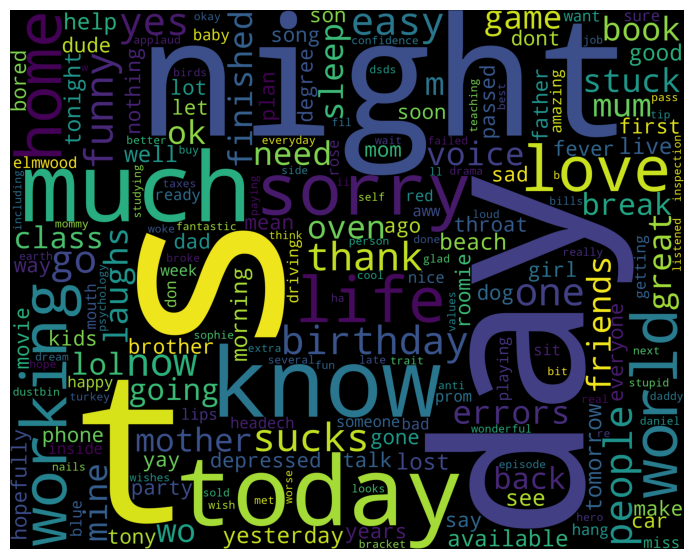

In [59]:
wordcloud_draw(word_features)

In [60]:
training_set = nltk.classify.apply_features(extract_features, feedback)
classifier = nltk.NaiveBayesClassifier.train(training_set)
classifier.show_most_informative_features(10)

Most Informative Features
          containts(day) = True           positi : negati =      4.9 : 1.0
         containts(want) = True           negati : positi =      4.0 : 1.0
          containts(fun) = True           positi : negati =      3.7 : 1.0
          containts(i`m) = True           negati : positi =      3.4 : 1.0
        containts(can`t) = True           negati : positi =      3.1 : 1.0
          containts(lol) = True           negati : positi =      3.1 : 1.0
         containts(much) = True           negati : positi =      3.1 : 1.0
         containts(feel) = True           negati : positi =      3.0 : 1.0
         containts(miss) = True           negati : positi =      2.9 : 1.0
      containts(morning) = True           positi : negati =      2.7 : 1.0


In [61]:
negative_count = 0
positive_count = 0
for object in test_negative:
    res = classifier.classify(extract_features(object.split()))
    if res == 'negative':
        negative_count += 1
for object in test_positive:
    res = classifier.classify(extract_features(object.split()))
    if res == 'positive':
        positive_count += 1
print('[Negative]: %s/%s' % (len(test_negative), negative_count))
print('[Positive]: %s/%s' % (len(test_positive), positive_count))

[Negative]: 36/10
[Positive]: 34/30


In [62]:
negative_count = 0
positive_count = 0
for object in train_negative:
    res = classifier.classify(extract_features(object.split()))
    if res == 'negative':
        negative_count += 1
for object in train_positive:
    res = classifier.classify(extract_features(object.split()))
    if res == 'positive':
        positive_count += 1
print('[Negative]: %s/%s' % (len(train_negative), negative_count))
print('[Positive]: %s/%s' % (len(train_positive), positive_count))

[Negative]: 98/91
[Positive]: 132/132
